In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [63]:
note_names = dict({0: 'C',
			 1: 'C#',
			 2: 'D',
			 3: 'D#',
			 4: 'E',
			 5: 'F',
			 6: 'F#',
			 7: 'G',
			 8: 'G#',
			 9: 'A',
			 10: 'Bb',
			 11: 'B'})

# model parameters (taken from Chew ISMIR paper)
r = 1
h = np.sqrt((2*math.pow(r,2))/15)


# ToDo: this is wrong...
def get_k(note):
	k = 0
	notei = 0
	notei_mirror = 0
	while ((notei != note) & (notei_mirror != note)):
		notei_mirror = (notei_mirror+5)%12
		notei = (notei+7)%12
		k += 1
	return k


def get_xyz(note):
	k = get_k(note)
	x = r*np.sin(k*np.pi/2)
	y = r*np.cos(k*np.pi/2)
	z = k*h

	return (x,y,z)

In [64]:
xs = []
ys = []
zs = []
for i in range(12):
    x,y,z=get_xyz(i)
    xs.append(x)
    ys.append(y)
    zs.append(z)

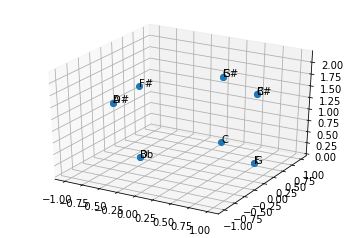

In [65]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xs, ys, zs, 'o')
for i in range(12):
    ax.text(xs[i], ys[i], zs[i], note_names[i])
 #   ax.annotate(note_names[i], (xs[i], ys[i], zs[i]))

In [54]:
from scipy.spatial.distance import euclidean

euclidean(get_xyz(0),get_xyz(5))

4.258325179379016

In [68]:
euclidean(get_xyz(3),get_xyz(10))

1.4605934866804429

In [60]:
get_k(5)

0
7
2
9
4
11
6
1
8
3
10


11

In [69]:
for i in range(12):
    print(note_names[i])
    print(euclidean(get_xyz(0),get_xyz(i)))

C
0.0
C#
2.309401076758503
D
2.1291625896895083
D#
1.7888543819998317
E
1.4605934866804429
F
1.4605934866804429
F#
2.966479394838265
G
1.4605934866804429
G#
1.4605934866804429
A
1.7888543819998317
Bb
2.1291625896895083
B
2.309401076758503


In [76]:
rangea = list(range(12)[9:])
rangeb = list(range(12)[:9])
range_combined = rangea+rangeb
for i in range_combined:
    print(note_names[i])
    print(euclidean(get_xyz(9),get_xyz(i)))

A
0.0
Bb
1.4605934866804429
B
2.1291625896895083
C
1.7888543819998317
C#
2.1291625896895083
D
1.4605934866804429
D#
0.0
E
1.4605934866804429
F
2.1291625896895083
F#
1.7888543819998317
G
2.1291625896895083
G#
1.4605934866804429


In [75]:
list(range(6))

[0, 1, 2, 3, 4, 5]